In [1]:
#PROBLEM STATEMENT
#Forecast the CocaCola prices data set. 
#Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. 
# Finally which model you will use for Forecasting.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms

In [3]:
df=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

In [4]:
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [5]:
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [7]:
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [8]:
df.duplicated().any()

False

In [9]:
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [10]:
#Creating quarter_year from the existing Quarte column
df['Quarter_Year'] = df['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))

In [11]:
df.sample()

,Quarter,Sales,Quarter_Year
12,Q1_89,1910.603996,Q1 1989


In [12]:
#Extract date from the quarters
df['Date'] = (pd.to_datetime(df['Quarter_Year'].str.split(' ').apply(lambda x: ''.join(x[::-1])),dayfirst=True))
df.sample(3)

,Quarter,Sales,Quarter_Year,Date
20,Q1_91,2480.973999,Q1 1991,1991-01-01
13,Q2_89,2331.164993,Q2 1989,1989-04-01
5,Q2_87,2104.411995,Q2 1987,1987-04-01


In [13]:
#Extracting quarters from and creatin seperate column
df['Quarters'] = 0

for i in range(42):
    n = df['Quarter'][i]
    df['Quarters'][i] = n[0:2]
    
df.sample(5)

<ipython-input-13-31854872e61a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quarters'][i] = n[0:2]
C:\Users\Nithesh Shetty\Downloads\python\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Quarter,Sales,Quarter_Year,Date,Quarters
15,Q4_89,2173.967995,Q4 1989,1989-10-01,Q4
18,Q3_90,2792.753998,Q3 1990,1990-07-01,Q3
37,Q2_95,4936.000000,Q2 1995,1995-04-01,Q2
7,Q4_87,1991.746998,Q4 1987,1987-10-01,Q4
39,Q4_95,4333.000000,Q4 1995,1995-10-01,Q4


In [14]:
#  Creating dummy variables for quarter columns
dummy = pd.DataFrame(pd.get_dummies(df['Quarters']))
df1 = pd.concat((df, dummy), axis=1)

In [15]:
dummy

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


In [16]:
df1

,Quarter,Sales,Quarter_Year,Date,Quarters,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2 1987,1987-04-01,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3 1987,1987-07-01,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4 1987,1987-10-01,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1 1988,1988-01-01,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2 1988,1988-04-01,Q2,0,1,0,0


In [17]:
df1.drop(['Quarter','Quarter_Year'] , axis =1, inplace = True)

In [18]:
df2=df1.set_index('Date')

In [19]:
df2.sample()

,Sales,Quarters,Q1,Q2,Q3,Q4
Date,,,,,,
1987-07-01,2014.362999,Q3,0,0,1,0


<AxesSubplot:xlabel='Date'>

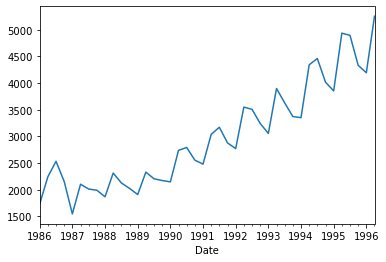

In [20]:
#Plottinfg the fields
df2.Sales.plot()

#Plot shows Sales is additive and cyclic in nature

<AxesSubplot:ylabel='Density'>

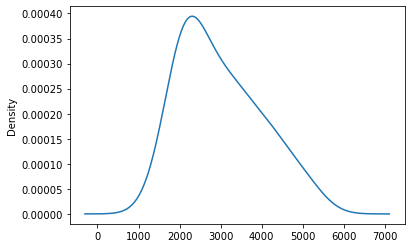

In [21]:
df2.Sales.plot(kind='kde')

In [22]:
#Get month and year columns in our data
df1["Date"] = pd.to_datetime(df1.Date,format="%b-%y")
df1["month"] = df1.Date.dt.strftime("%b") # month extraction
df1["year"] = df1.Date.dt.strftime("%Y") # year extraction


In [23]:
df1.sample()

,Sales,Date,Quarters,Q1,Q2,Q3,Q4,month,year
2,2533.804993,1986-07-01,Q3,0,0,1,0,Jul,1986


<AxesSubplot:xlabel='Quarters', ylabel='year'>

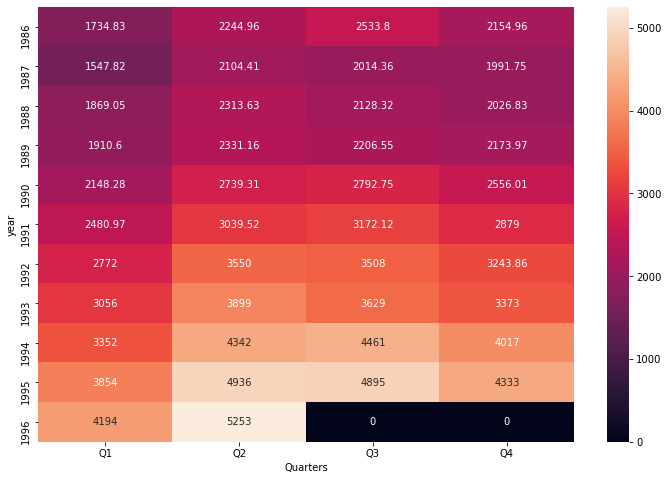

In [24]:
import seaborn as sns
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=df1,values="Sales",index="year",columns="Quarters",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

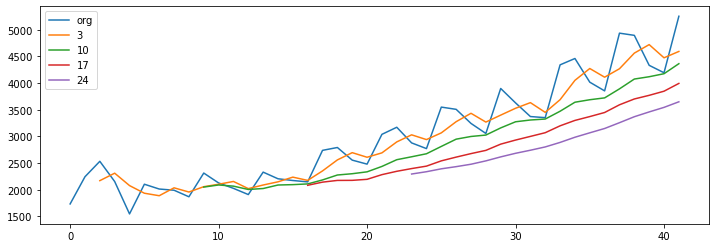

In [25]:
#Smoothning of the graph
plt.figure(figsize=(12,4))
df1.Sales.plot(label="org")
for i in range(3,30,7):
    df1["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

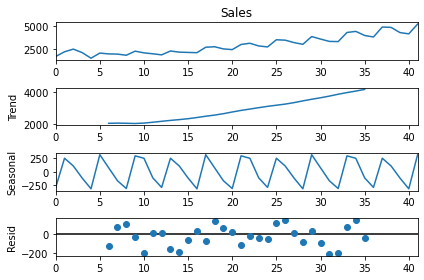

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(df1.Sales,period=12)
decompose_ts_add.plot()
plt.show() 

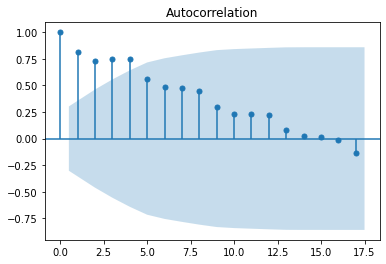

In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(df1["Sales"]) 

In [28]:
df1.shape

(42, 9)

In [29]:
x=np.arange(1,43)
t=pd.Series(data=x)
t_sqr=pd.Series(data=(x*x))

In [30]:
df1['log_sales'] = np.log(df1['Sales'])

In [31]:
df1['t'] = t
df1['t_sqr'] = t_sqr

In [32]:
df_train =df1.head(30)
df_test =df1.tail(12)

In [33]:
def MAE(pred,org):
    temp = np.abs((pred-org)/org)
    return np.mean(temp)

In [34]:
# Building linear model
import statsmodels.formula.api as smf 
linear_model = smf.ols('Sales~t',data=df_train).fit()                                                    
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(df_test['t'])))                                                
mae_linear = MAE(df_test['Sales'],pred_linear)                                                                     
mae_linear

0.15390960798745942

In [35]:
#Building the exponential model
Exp = smf.ols('log_sales~t',data=df_train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(df_test['t'])))
mae_Exp = MAE(df_test['Sales'], np.exp(pred_Exp))
mae_Exp

0.11010762144393398

In [36]:
#Building the Quadratic model
Quad = smf.ols('Sales~t+t_sqr',data=df_train).fit()
pred_Quad = pd.Series(Quad.predict(df_test[["t","t_sqr"]]))
mae_Quad = MAE(df_test['Sales'],pred_Quad)
mae_Quad

0.10558313155976658

In [37]:
#Building the Additive seasonality model
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=df_train).fit()
pred_add_sea = pd.Series(add_sea.predict(df_test[['Q1','Q2','Q3','Q4']]))
mae_add_sea = MAE(df_test['Sales'],pred_add_sea)
mae_add_sea

0.6840229690452242

In [38]:
#Building the Additive Seasonality Quadratic model

add_sea_Quad = smf.ols('Sales~t+t_sqr+Q1+Q2+Q3+Q4',data=df_train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(df_test[['Q1','Q2','Q3','Q4','t','t_sqr']]))
mae_add_sea_quad = MAE(df_test['Sales'], pred_add_sea_quad)
mae_add_sea_quad

0.10915490303385693

In [39]:
##Multiplicative Seasonality
Mul_sea = smf.ols('log_sales~Q1+Q2+Q3+Q4',data = df_train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(df_test))
mae_Mult_sea = MAE(df_test['Sales'], np.exp(pred_Mult_sea))
mae_Mult_sea

0.7197711999139446

In [40]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data = df_train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(df_test))
mae_Mult_add_sea = MAE(df_test['Sales'], np.exp(pred_Mult_add_sea))
mae_Mult_add_sea 

0.09114335527296334

### Model Building with data driven models

In [41]:
#Importing libraries reqd to build the data driven models
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [42]:
df_train = df.head(30)
df_test = df.tail(12)

In [43]:
#Simple Exponential Method
ses_model = SimpleExpSmoothing(df_train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = df_test.index[0],end = df_test.index[-1])
MAE_ses = MAE(pred_ses,df_test.Sales) 
MAE_ses

C:\Users\Nithesh Shetty\Downloads\python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


0.22046762366543451

In [44]:
# Holt method 
hw_model = Holt(df_train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = df_test.index[0],end = df_test.index[-1])
MAE_hw = MAE(pred_hw,df_test.Sales) 
MAE_hw

<ipython-input-44-98e66e015743>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(df_train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


0.11213842042589699

In [45]:
#Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(df_train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = df_test.index[0],end = df_test.index[-1])
MAE__hwe_add_add = MAE(pred_hwe_add_add,df_test.Sales) 
MAE__hwe_add_add

0.048429907139930346

In [46]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(df_train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = df_test.index[0],end = df_test.index[-1])
MAE__hwe_mul_add = MAE(pred_hwe_mul_add,df_test.Sales)
MAE__hwe_mul_add

0.043171145684407164

### Building ARIMA Model

In [47]:
from datetime import datetime,timedelta

In [48]:
split_point = len(df) - 12
dataset,validation = df[0:split_point], df[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

Dataset 30, Validation 12


In [49]:
# evaluate a persistence model
# prepare data
X = dataset.Sales.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [50]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
MAE_base = MAE(predictions, test)
print('MAE_base: %.3f' % MAE_base)

>Predicted=2206.550, Expected=2173.968
>Predicted=2173.968, Expected=2148.278
>Predicted=2148.278, Expected=2739.308
>Predicted=2739.308, Expected=2792.754
>Predicted=2792.754, Expected=2556.010
>Predicted=2556.010, Expected=2480.974
>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
MAE_base: 0.089


In [51]:
df1.set_index('Date',inplace=True)

In [52]:
df1

,Sales,Quarters,Q1,Q2,Q3,Q4,month,year,log_sales,t,t_sqr
Date,,,,,,,,,,,
1986-01-01,1734.827000,Q1,1,0,0,0,Jan,1986,7.458663,1,1
1986-04-01,2244.960999,Q2,0,1,0,0,Apr,1986,7.716443,2,4
1986-07-01,2533.804993,Q3,0,0,1,0,Jul,1986,7.837477,3,9
1986-10-01,2154.962997,Q4,0,0,0,1,Oct,1986,7.675529,4,16
1987-01-01,1547.818996,Q1,1,0,0,0,Jan,1987,7.344602,5,25
1987-04-01,2104.411995,Q2,0,1,0,0,Apr,1987,7.651791,6,36
1987-07-01,2014.362999,Q3,0,0,1,0,Jul,1987,7.608058,7,49
1987-10-01,1991.746998,Q4,0,0,0,1,Oct,1987,7.596767,8,64
1988-01-01,1869.049999,Q1,1,0,0,0,Jan,1988,7.533186,9,81


In [53]:
#performing test to check whether data is stationary or not
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [54]:
adf_test(df1['Sales'])

ADF Statistics: 1.309421015326809
p- value: 0.9966611673930905
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [55]:
#Now genearating first difference to make the data stationary
df1['Sales First Difference']=df1['Sales']-df1['Sales'].shift(1)

In [56]:
adf_test(df1['Sales First Difference'].dropna())

ADF Statistics: -2.501537002033792
p- value: 0.11510080332405692
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [57]:
#Now genearating second difference to make the data stationary
df1['Sales Second Difference']=df1['Sales First Difference']-df1['Sales First Difference'].shift(1)

In [58]:
adf_test(df1['Sales Second Difference'].dropna())

ADF Statistics: -27.632624946381693
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [59]:
#Since the second difference is stationary we can build the arima model on it

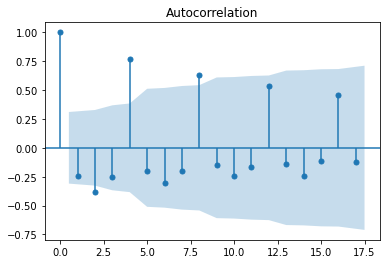

In [60]:
acf = plot_acf(df1["Sales Second Difference"].dropna())  

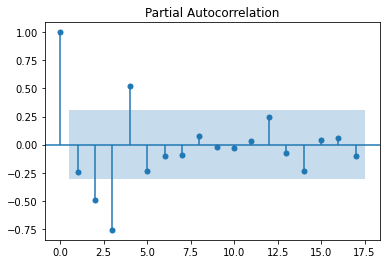

In [61]:
pacf = plot_pacf(df1["Sales Second Difference"].dropna()) 

In [62]:
# Using grid searchCV to optimize the arima parameters 
from pandas import read_csv
from statsmodels.tsa.statespace.sarimax import SARIMAX
def evaluate_arima_model(X, arima_order):

    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]

    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        MAE = np.mean(np.abs((predictions-test)/test))
        return MAE

In [63]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    MAE = evaluate_arima_model(train, order)
                    if MAE < best_score:
                        best_score, best_cfg = MAE, order
                    print('ARIMA%s MAE=%.3f' % (order,MAE))
                except:
                    continue
    print('Best ARIMA%s MAE=%.3f' % (best_cfg, best_score))

In [64]:

train_dataset_end=datetime(1994,1,1)
test_dataset_end=datetime(1996,4,1)

In [65]:
train_data=df1[:train_dataset_end]
test_data=df1[train_dataset_end+timedelta(days=1):test_dataset_end]

In [66]:
# load dataset
%time

# evaluate parameters
p_values = range(0, 10)
d_values = range(0, 10)
q_values = range(0, 10)

evaluate_models(train_data['Sales Second Difference'].dropna(), p_values, d_values, q_values)

Wall time: 0 ns
Best ARIMANone MAE=inf


In [67]:
from statsmodels.tsa.arima_model import ARIMA
X = train_data.Sales.values
X = X.astype('float32')

In [68]:
# fit model on train data
model = SARIMAX(X, order=(2, 2, 0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=9)[0]
forecast


3198.825413321555

In [69]:
MAE_ARIMA = MAE(forecast, test_data.Sales)

In [70]:
#Compare the results 

data = {"MODEL":pd.Series(["MAE_linear","MAE_Exp","MAE_Quad","MAE_add_sea","MAE_add_sea_quad","MAE_Mult_sea","MAE_Mult_add_sea","MAE_ses","MAE_hw","MAE_hwe_add_add","MAE_hwe_mul_add","MAE_base","MAE_ARIMA"]),"MAE_Values":pd.Series([mae_linear,mae_Exp,mae_Quad,mae_add_sea,mae_add_sea_quad,mae_Mult_sea,mae_Mult_add_sea,MAE_ses,MAE_hw,MAE__hwe_add_add,MAE__hwe_mul_add,MAE_base,MAE_ARIMA])}
table_mae=pd.DataFrame(data)
table_mae.sort_values(['MAE_Values'])

,MODEL,MAE_Values
10,MAE_hwe_mul_add,0.043171
9,MAE_hwe_add_add,0.048430
11,MAE_base,0.089395
6,MAE_Mult_add_sea,0.091143
2,MAE_Quad,0.105583
4,MAE_add_sea_quad,0.109155
1,MAE_Exp,0.110108
8,MAE_hw,0.112138
0,MAE_linear,0.153910
7,MAE_ses,0.220468


Holts winter exponential smoothing with multiplicative seasonality and additive trend giving us best results as the Test MAE is the lowest for this data.